# Understanding Python Libraries

In some ways this lecture will be somewhat of a digression from the more or less linear path we've taken over the last five lectures.  In another way, this lecture was always the intended goal of the last five lectures.  

Everything was in a sense, to prepare you for the ease of leveraging the Python ecosystem, the true power of the Python language:

It does not come from its speed or clear and simple syntax - Ruby, Javascript (some times), Perl, Lua and Julia all have very similar syntax to Python.

The true power of Python is it's ecosystem, the community that builds and maintains it, as well as the other libraries from a third party that it has available.

These are the true powers of Python - that developers around the world believe in it, and so it is strong.  Every technology and indeed, every endeavor is strengthened by the people who take part.  The more that take part, the powerful the thing.


Today we are going to cover the following built-ins:

* itertools
* functools
* inspect
* code
* dis
* collections

And the following python third party libraries:

* numpy
* pandas
* requests

## The Python Import system

In Python if you want to add extra functionality you need to install and import it.  We'll start with the built-in libraries to understand how the import system works.  

In [4]:
import math

print(math.pow(2, 2))

4.0


The import system allows us to import built-in Python libraries.  These libraries are just classes someone else wrote.  There is nothing different from the classes we wrote last lecture, except we don't have to write them ourselves in order to make use of them.

However, if we didn't write a class in the program we want to use it in, we need to import it, like we did above.  This tells Python to include that class in our program.  Without explicitly importing a Python library, it cannot be used:

In [2]:
np.array

NameError: name 'np' is not defined

In [3]:
import numpy as np

np.array([1,2,3])

array([1, 2, 3])

Once we import a library we are free to use it however we like.  And we can even rename a library with the `as` keyword in the import statement.  Popular libraries like `pandas` and `numpy` as often imported with short hand because they are used so frequently.

We can also import all the subclasses and methods of a library with the `from [LIBRARY] import *` convention:

In [7]:
print("Before we do the import *")
before = dir()
before

Before we do the import *


['In',
 'Out',
 '_',
 '_3',
 '_4',
 '_6',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'currently_in_scope',
 'exit',
 'get_ipython',
 'math',
 'np',
 'quit']

In [18]:
dir(math)

['__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'acos',
 'acosh',
 'asin',
 'asinh',
 'atan',
 'atan2',
 'atanh',
 'ceil',
 'copysign',
 'cos',
 'cosh',
 'degrees',
 'e',
 'erf',
 'erfc',
 'exp',
 'expm1',
 'fabs',
 'factorial',
 'floor',
 'fmod',
 'frexp',
 'fsum',
 'gamma',
 'gcd',
 'hypot',
 'inf',
 'isclose',
 'isfinite',
 'isinf',
 'isnan',
 'ldexp',
 'lgamma',
 'log',
 'log10',
 'log1p',
 'log2',
 'modf',
 'nan',
 'pi',
 'pow',
 'radians',
 'sin',
 'sinh',
 'sqrt',
 'tan',
 'tanh',
 'tau',
 'trunc']

In [9]:
print("Newly in scope:")
from functools import *
after = dir()
[elem for elem in after if elem not in before]

Newly in scope:


['WRAPPER_ASSIGNMENTS',
 'WRAPPER_UPDATES',
 '_7',
 '_8',
 '_i8',
 '_i9',
 'after',
 'before',
 'cmp_to_key',
 'lru_cache',
 'partial',
 'partialmethod',
 'reduce',
 'singledispatch',
 'total_ordering',
 'update_wrapper',
 'wraps']

As you can see we've imported a bunch of stuff into the main scope with syntax.  Finally let's look at how we can import our own functions from different files!

In [19]:
from functools import partial

partial

functools.partial

In [10]:
import example_file

example_file.function_one(5, 4)

9

All Python files act like libraries, in a sense.  They can be imported across different files.  Just make sure they are all in the same directory!

## Leveraging built-in libraries

Now that we know how to import built-in libraries let's look at some examples that use them!


In [5]:
import functools

def function_one(x, y, z):
    return x + y + z


function_two = functools.partial(function_one, 5)
print(function_two(6,7))
function_three = functools.partial(function_one, 5, 6)
print(function_three(8))
function_four = functools.partial(function_one, 5, 8, 9)
print(function_four())

18
19
22


In [21]:
function_two

functools.partial(<function function_one at 0x7f22c84777b8>, 5)

As you can see the partial method lets you partially apply parameters to a function making new functions that take less arguments.  This allows us to carry the state of some parameters around without having to supply all parameters to a function.

In [6]:
def flip_symbol(val):
    return not val

functools.reduce(flip_symbol, [True, False, True])

TypeError: flip_symbol() takes 1 positional argument but 2 were given

In [24]:
def multiplier(x, y):
    return x * y

def adder(x, y):
    return x + y

print("How to multiply multiple elements of a list together fast", functools.reduce(multiplier, [1,2,3]))
print("How to add multiple elements of a list together fast", functools.reduce(adder, [1,2,3,4]))

How to multiply multiple elements of a list together fast 6
How to add multiple elements of a list together fast 10


In [25]:
product = 1
listing = [1,2,3]
for elem in listing:
    product *= elem
product

6

In [16]:
# implement multiply_all

def mult(x, y):
    return x * y

multiply_all = functools.partial(functools.reduce, mult)
multiply_all(list(range(1,10)))

362880

In [26]:
product = 1
listing = list(range(1, 10))
for elem in listing:
    product *= elem
product

362880

In [18]:
# implement add_all

def add(x, y):
    return x + y

add_all = functools.partial(functools.reduce, add)
add_all(list(range(15)))

105

In [23]:
sum(list(range(15)))

105

## Itertools

Now we'll understand some of the functionality of itertools.  First, let's see what methods we have available:

In [27]:
import itertools

[elem for elem in dir(itertools) if "__" not in elem]

['_grouper',
 '_tee',
 '_tee_dataobject',
 'accumulate',
 'chain',
 'combinations',
 'combinations_with_replacement',
 'compress',
 'count',
 'cycle',
 'dropwhile',
 'filterfalse',
 'groupby',
 'islice',
 'permutations',
 'product',
 'repeat',
 'starmap',
 'takewhile',
 'tee',
 'zip_longest']

In [26]:
for elem in itertools.product([1,2,3], [4,5,6]):
    print(elem)

(1, 4)
(1, 5)
(1, 6)
(2, 4)
(2, 5)
(2, 6)
(3, 4)
(3, 5)
(3, 6)


In [ ]:
def arange(start, stop, step=0.01):
    cur = start
    while start < stop:
        yield cur
        cur += step
        
cartesian_product = [elem for elem in itertools.product(
     list(arange(0,10)), 
     list(arange(0,10)))
]

cartesian_product

In [30]:
listing = list(range(5))
for elem in itertools.combinations(listing, 2):
    print(elem)

(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 2)
(1, 3)
(1, 4)
(2, 3)
(2, 4)
(3, 4)


In [31]:
listing = list(range(5))
for elem in itertools.permutations(listing, 2):
    print(elem)

(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 0)
(1, 2)
(1, 3)
(1, 4)
(2, 0)
(2, 1)
(2, 3)
(2, 4)
(3, 0)
(3, 1)
(3, 2)
(3, 4)
(4, 0)
(4, 1)
(4, 2)
(4, 3)


## Next we'll look at inspect

Which can help us better understand the code we are working with, by showing us the source!

In [37]:
import inspect

for elem in inspect.getsourcelines(example_file.function_one)[0]:
    print(elem)

def function_one(x, y):

    return x + y



In [7]:
import inspect

for elem in inspect.getsourcelines(inspect.getsourcelines)[0]:
    print(elem)

def getsourcelines(object):

    """Return a list of source lines and starting line number for an object.



    The argument may be a module, class, method, function, traceback, frame,

    or code object.  The source code is returned as a list of the lines

    corresponding to the object and the line number indicates where in the

    original source file the first line of code was found.  An OSError is

    raised if the source code cannot be retrieved."""

    object = unwrap(object)

    lines, lnum = findsource(object)



    if ismodule(object):

        return lines, 0

    else:

        return getblock(lines[lnum:]), lnum + 1



In [38]:
dir(inspect)

['ArgInfo',
 'ArgSpec',
 'Arguments',
 'Attribute',
 'BlockFinder',
 'BoundArguments',
 'CORO_CLOSED',
 'CORO_CREATED',
 'CORO_RUNNING',
 'CORO_SUSPENDED',
 'CO_ASYNC_GENERATOR',
 'CO_COROUTINE',
 'CO_GENERATOR',
 'CO_ITERABLE_COROUTINE',
 'CO_NESTED',
 'CO_NEWLOCALS',
 'CO_NOFREE',
 'CO_OPTIMIZED',
 'CO_VARARGS',
 'CO_VARKEYWORDS',
 'ClosureVars',
 'EndOfBlock',
 'FrameInfo',
 'FullArgSpec',
 'GEN_CLOSED',
 'GEN_CREATED',
 'GEN_RUNNING',
 'GEN_SUSPENDED',
 'OrderedDict',
 'Parameter',
 'Signature',
 'TPFLAGS_IS_ABSTRACT',
 'Traceback',
 '_ClassMethodWrapper',
 '_KEYWORD_ONLY',
 '_MethodWrapper',
 '_NonUserDefinedCallables',
 '_POSITIONAL_ONLY',
 '_POSITIONAL_OR_KEYWORD',
 '_ParameterKind',
 '_VAR_KEYWORD',
 '_VAR_POSITIONAL',
 '_WrapperDescriptor',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_check_class',
 '_check_instance',
 '_empty',
 '_filesbymodname',
 '_findclass',
 '_finddoc',
 '_getfullargs'

There is a bunch more in inspect that is a little too advanced for this lecture, but it is one of _the_ most powerful python modules we've seen thus far.

##  The dis module

Being able to see the source code for a module is pretty cool!  But sometimes you want to go deeper - we can also look at the disassembled Python code, to _really_ understand what it's doing.

In [39]:
import dis

dis.dis(example_file.function_one)

  2           0 LOAD_FAST                0 (x)
              2 LOAD_FAST                1 (y)
              4 BINARY_ADD
              6 RETURN_VALUE


## Debugging in real time

So far we've looked at how to do fancy iteration and how to statically debug our code.  Now we'll look at how to dynamically debug our code!

Here we will make use of the `code` module to do so.  

## Checking out collections

So far we've covered two main threads:

* fancy iteration
* fancy debugging

Now we'll add a third tool to our list:

* fancy data structures

Before we can do so, let's introduce a data structure we've been lacking that is a mainstay of the python eco system - the python dictionary.

In [40]:
dicter = {"Hello": "hello", "there":"there friend"}
string = "Hello there"
new_string = []
for elem in string.split():
    new_string.append(dicter[elem])
" ".join(new_string)

'hello there friend'

A dictionary is a discrete mapping from a key to a value.  The keys in a dictionary are the things that get mapped to the values of the dictionary.  There can only be one key per value.  But the same value can be used as many times as we might like.

In [12]:
from random import randint
dicter = {}
for i in range(1000):
    dicter[i] = i+1

value_to_update = randint(0,999)
value_to_update, dicter[value_to_update] 

(293, 294)

In addition to being great for replacement, dictionaries can be used to store computation.  These stored results always have `O(1)` running time to look up, so once we've done a computation once, we can _almost_ costlessly look them up.  Which is incredibly powerful.

Let's do something more complicated.

In [1]:
import time

def fib(n, dicter):
    if n == 0:
        return 1
    if n == 1:
        return 1
    if n in dicter:
        return dicter[n]
    else:
        return fib(n-1, dicter) + fib(n-2, dicter)
    
def fib_calc(n, dicter):
    if n in dicter:
        return dicter[n]
    else:
        return fib(n, dicter)

start = time.time()
dicter = {}
for elem in range(200):
    dicter[elem] = fib_calc(elem, dicter)
time.time() - start

0.0003380775451660156

As a comparison let's just see how long it takes to calculate the 30th fibonacci number normally.

In [48]:
import time

def fib(n):
    if n == 0:
        return 1
    if n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

start = time.time()

fib(30)

time.time() - start

0.34152913093566895

As you can see, _just_ the 30th fibonacci number without dictionaries takes around 1000 times longer than calculating the first _100_ fibonacci numbers _with_ the dictionary.  That is a _huge_ deal.

So dictionaries are a powerful tool and when used correctly can make a big difference in running time.  We've effectively taken a `O(2^n)` algorithm and made it _fast_.  Let's see just how fast.

In [50]:
import time

def fib(n, dicter, count):
    if n == 0:
        return 1, count+1
    if n == 1:
        return 1, count+1
    if n in dicter:
        return dicter[n], count+1
    else:
        val_one, count = fib(n-1, dicter, count) 
        val_two, count = fib(n-2, dicter, count)
        return val_one+val_two, count+1
    
def fib_calc(n, dicter, count):
    if n in dicter:
        return dicter[n], count+1
    else:
        return fib(n, dicter, count)

start = time.time()
dicter = {}
count = 0
for elem in range(100):
    dicter[elem], count = fib_calc(elem, dicter, count)
time.time() - start
count

296

_This_ is the craziest part about dictionaries.  We didn't just increase the number of calls to turn an exponential running time algorithm into a linear running time algorithm, we made it _far_ below linear, something known as sublinear.

Here's an analysis of the running time of this algorithm with dictionaries.

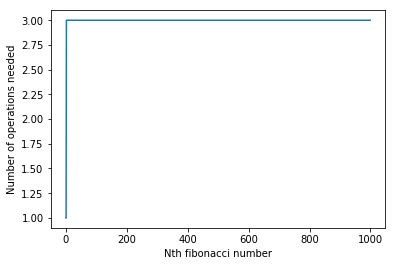

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

def fib(n, dicter, count):
    if n == 0:
        return 1, count+1
    if n == 1:
        return 1, count+1
    if n in dicter:
        return dicter[n], count+1
    else:
        val_one, count = fib(n-1, dicter, count) 
        val_two, count = fib(n-2, dicter, count)
        return val_one+val_two, count+1
    
def fib_calc(n, dicter, count):
    if n in dicter:
        return dicter[n], count+1
    else:
        return fib(n, dicter, count)

start = time.time()
dicter = {}
count = 0
counts = []
for elem in range(1000):
    dicter[elem], count = fib_calc(elem, dicter, count)
    counts.append(count)
    count = 0

x = list(range(len(counts)))
y = counts
plt.plot(x, y)
plt.xlabel("Nth fibonacci number")
plt.ylabel("Number of operations needed")
plt.show()

So as we can see, we've effectively made this `O(n^2)` algorithm an `O(1)` algorithm.  _Pretty nuts_ 

## Checking out collections (for real)

Now that we have a decent understanding of the mainstay data structures in Python, let's go ahead and look at some of the fancy data structures we get with collections:

* defaultdict
* deque
* namedtuple

Let's checkout `defaultdict` first!

In [67]:
rant = """Hello there.  My name is Eric.  I'm your instructor.  Hello?  Hello?  Are you there?  
Well, I guess I'm all alone here.  But that's what it is I guess...  I'm just all alone!
How sad for me.  I guess I'll just go off and do something else."""

elements = rant.split()
unique_elements = list(set(elements))
dicter = {}.fromkeys(unique_elements, list())

for index, elem in enumerate(rant.split()):
    dicter[elem].append(index)
    
dicter

{'Are': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 'But': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 'Eric.': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 'Hello': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  2

The above code is clearly wrong.  The reason is because lists in python are done internally with pointers.  So you can't initialize an empty list and have it work.  We could of course do the following:

In [69]:
rant = """Hello there.  My name is Eric.  I'm your instructor.  Hello?  Hello?  Are you there?  
Well, I guess I'm all alone here.  But that's what it is I guess...  I'm just all alone!
How sad for me.  I guess I'll just go off and do something else."""

dicter = {}
for index, elem in enumerate(rant.split()):
    elem = elem.replace(".","")
    elem = elem.replace("?","")
    elem = elem.replace("!","")
    if elem not in dicter:
        dicter[elem] = [index]
    else:
        dicter[elem].append(index)
    
dicter

{'Are': [11],
 'But': [21],
 'Eric': [5],
 'Hello': [0, 9, 10],
 'How': [32],
 'I': [15, 26, 36],
 "I'll": [38],
 "I'm": [6, 17, 28],
 'My': [2],
 'Well,': [14],
 'all': [18, 30],
 'alone': [19, 31],
 'and': [42],
 'do': [43],
 'else': [45],
 'for': [34],
 'go': [40],
 'guess': [16, 27, 37],
 'here': [20],
 'instructor': [8],
 'is': [4, 25],
 'it': [24],
 'just': [29, 39],
 'me': [35],
 'name': [3],
 'off': [41],
 'sad': [33],
 'something': [44],
 "that's": [22],
 'there': [1, 13],
 'what': [23],
 'you': [12],
 'your': [7]}

But that's so much work!  Let's see if the `defaultdict` does better on number of lines.  Spoiler, it does.

In [64]:
from collections import defaultdict

dicter = defaultdict(list)

rant = """Hello there.  My name is Eric.  I'm your instructor.  Hello?  Hello?  Are you there?  
Well, I guess I'm all alone here.  But that's what it is I guess...  I'm just all alone!
How sad for me.  I guess I'll just go off and do something else."""

for index, elem in enumerate(rant.split()):
    elem = elem.replace(".","")
    elem = elem.replace("?","")
    elem = elem.replace("!","")
    dicter[elem].append(index)
    
dicter

defaultdict(list,
            {'Are': [11],
             'But': [21],
             'Eric': [5],
             'Hello': [0, 9, 10],
             'How': [32],
             'I': [15, 26, 36],
             "I'll": [38],
             "I'm": [6, 17, 28],
             'My': [2],
             'Well,': [14],
             'all': [18, 30],
             'alone': [19, 31],
             'and': [42],
             'do': [43],
             'else': [45],
             'for': [34],
             'go': [40],
             'guess': [16, 27, 37],
             'here': [20],
             'instructor': [8],
             'is': [4, 25],
             'it': [24],
             'just': [29, 39],
             'me': [35],
             'name': [3],
             'off': [41],
             'sad': [33],
             'something': [44],
             "that's": [22],
             'there': [1, 13],
             'what': [23],
             'you': [12],
             'your': [7]})

Next let's look at the `deque`

Recall how stacks and queues work:

In [76]:
stack = []
for elem in range(10):
    stack.append(elem)
for _ in range(len(stack)):
    print(stack.pop())

9
8
7
6
5
4
3
2
1
0


In [77]:
queue = []
for elem in range(10):
    queue.insert(0, elem)
for _ in range(len(queue)):
    print(queue.pop())

0
1
2
3
4
5
6
7
8
9


Let's see how fast our stacks and queues are with a list.

In [81]:
import time

start = time.time()
stack = []
for elem in range(10000):
    stack.append(elem)
for _ in range(len(stack)):
    stack.pop()
time.time() - start

0.007922172546386719

In [80]:
import time

start = time.time()
queue = []
for elem in range(10000):
    queue.insert(0, elem)
for _ in range(len(queue)):
    queue.pop()
time.time() - start


0.02551889419555664

Can we do better with a `deque`?  

In [90]:
from collections import deque
import time

start = time.time()
stack = deque()
for elem in range(10000):
    stack.appendleft(elem)
for _ in range(len(stack)):
    stack.popleft()
time.time() - start

0.0069196224212646484

In [87]:
import time
from collections import deque

start = time.time()
queue = deque()
for elem in range(10000):
    queue.appendleft(elem)
for _ in range(len(queue)):
    queue.pop()
time.time() - start


0.005781888961791992

It is a bit unclear whether or not `deque`s are much faster than lists (not a bad thing).  Let's get some descriptive statistics to understand this better.

In [91]:
import time
import statistics as st

timing = []
for _ in range(1000):
    start = time.time()
    stack = []
    for elem in range(10000):
        stack.append(elem)
    for _ in range(len(stack)):
        stack.pop()
    timing.append(time.time() - start)
st.mean(timing), st.stdev(timing)

(0.002029549837112427, 0.00026483712376653866)

In [92]:
from collections import deque
import time
import statistics as st

timing = []
for _ in range(1000):
    start = time.time()
    stack = deque()
    for elem in range(10000):
        stack.appendleft(elem)
    for _ in range(len(stack)):
        stack.popleft()
    timing.append(time.time() - start)
st.mean(timing), st.stdev(timing)

(0.001821763515472412, 0.0002993193810048477)

For stacks there doesn't appeat to be a significant difference between lists and deques.

In [93]:
import time
import statistics as st

timing = []
for _ in range(1000):
    start = time.time()
    queue = []
    for elem in range(10000):
        queue.insert(0, elem)
    for _ in range(len(queue)):
        queue.pop()
    timing.append(time.time() - start)
st.mean(timing), st.stdev(timing)

(0.01524531364440918, 0.001943443773105683)

In [94]:
import time
from collections import deque
import statistics as st

timing = []
for _ in range(1000):
    start = time.time()
    queue = deque()
    for elem in range(10000):
        queue.appendleft(elem)
    for _ in range(len(queue)):
        queue.pop()
    timing.append(time.time() - start)
st.mean(timing), st.stdev(timing)

(0.0018512899875640868, 0.0002541919514303847)

There is clearly a performance gain for queues though!  About an order of magnitude.  I guess that's why they call it a deque and not a stackqueue.

Next we'll look at namedtuples.  These are basically like classes without all the templating.  They are usually used just for data:

In [15]:
from collections import namedtuple

Hello = namedtuple("Hello", ('x', 'y'))
hello = Hello(5, 10)
print(hello.x)
print(hello.y)

5
10


In [18]:
hello.x += 17

AttributeError: can't set attribute

In [101]:
from collections import namedtuple
def adder(x, y):
    return x + y

X = namedtuple("X", ("a", "b", "func"))
x = X(5, 10, adder)
print(x.a)
print(x.b)
x.func(x.a, x.b)

5
10


15

We can _also_ define functions on a namedtuple, which can be helpful.  But notice that we don't pass any state.  So our function is a function in the true sense.  We can't act on any data stored in the namedtuple instance.

So a namedtuple is like a class without any shared state.  For some people this is a big plus, for others a big drawback.  It depends on who you are and you feel about state.

## Dealing with installable libraries

In python in addition to the amazing set of built-in libraries, you also have a plethora (like thousands upon thousands) of libraries written by Python programmers, for Python programmers, completely free.  The free and open source nature of the language is the heart of its success.  If you want to run some code someone else wrote, you only need to install it.

First we'll need `pip` the python package manager, that will allow us to install packages.

## DEMO OF DOWNLOADING AND INSTALLING PIP GOES HERE

Once we have pip we'll do:

On linux:

`sudo python -m pip install [PACKAGE NAME]`

On Mac:

`python -m pip install [PACKAGE NAME]`

On Windows:

Depending on where you installed python you'll need open a shell with administrative privilleges and run:

`python -m pip install [PACKAGE NAME]`

We'll be installing three packages:

* requests
* numpy
* pandas


# A brief introduction to the web

In order to understand our first demo we'll need to understand how the web works.

At the most basic level the internet is just a bunch of computers connected together.  Whenever we visit a website what we are really doing is making a `GET` request to a computer someone else owns.  And when we submit a form or send any data via that connection we make a `POST` request.

The reason for this is because most things on the web follow the client - server model of message passing (which is all the internet really is).  And more specifically client - server models are server centric.  Meaning, when you make a `GET` request, you make it with respect to the server.  You `GET` from the server.

When you make a `POST` request, you make it with respect to the server.  You `POST` to the server.

Let's see this in action with the `requests` library:

In [19]:
import requests

response = requests.get("https://www.microsoft.com")

response.text

'\r\n\r\n\r\n<!DOCTYPE html>\r\n<html lang="en-us" dir="ltr">\r\n<head data-info="{&quot;v&quot;:&quot;1.0.6743.28932&quot;,&quot;a&quot;:&quot;b6068184-3227-4b43-a1ee-fb18656dd61b&quot;,&quot;cn&quot;:&quot;3&quot;,&quot;az&quot;:&quot;{did:144fe3c2022447b284446b59d45b1858, rid: 3, sn: marketingsites-eus-prod, dt: 2018-05-28T17:42:33.9962022Z, bt: 2018-06-18T16:04:24.0000000Z}&quot;,&quot;ddpi&quot;:&quot;1&quot;,&quot;dpio&quot;:&quot;&quot;,&quot;dpi&quot;:&quot;1&quot;,&quot;dg&quot;:&quot;uplevel.web.pc&quot;,&quot;th&quot;:&quot;default&quot;,&quot;m&quot;:&quot;en-us&quot;,&quot;l&quot;:&quot;en-us&quot;,&quot;mu&quot;:&quot;en-us&quot;,&quot;rp&quot;:&quot;/en-us/&quot;,&quot;f&quot;:&quot;searchvnext,serverinterstitial,xboxcontentondesktop,17195425t1,17196388c,17196353c,15291365t,pre17634968t1topstripecolor,17035623t1,sfwaa_bar_1,sfwaa_treatment&quot;,&quot;bh&quot;:{}}">\r\n        <meta charset="UTF-8" />\r\n\r\n    <meta http-equiv="x-ua-compatible" content="ie=edge" />\r\n

Notice the use of the `get` in the method name.  What we get back from the server is a bunch of html, css, and javascript.  Our browser then typically renders this, so it looks all pretty.

We can do a lot more with requests than you might think.  But in order to see all of that we'll need to wait for a future lecture.

## A Faster list

The built-in python lists are fast, but no where near as fast as pandas and numpy data structures.  That's because these data structures have been performance tuned for scientific computing, which needs to be very, very fast.

We'll see some new conventions as we start to work with these data structures.  But the extra work will be worth it, because of the massive performance speed up.

In [3]:
import numpy as np
import time
import random
import statistics as st

vanilla_python = []
np_python = []
for _ in range(1000):
    start = time.time()
    random_list = [random.random() for _ in range(10000)]
    sum(random_list)
    vanilla_python.append(time.time() - start)
    
    start = time.time()
    arr = np.random.random_sample(10000)
    arr.sum()
    np_python.append(time.time() - start)
    
print(st.mean(vanilla_python), st.mean(np_python))
print(st.stdev(vanilla_python), st.stdev(np_python))

0.0009074084758758545 8.473420143127442e-05
0.00010982320895201759 1.4420355959244755e-05


As you can see, numpy is 2 orders of magnitude faster than vanilla python!  This is a huge performance gain!  We'll look more at performance gain more in future lectures.

Now that we see the benefit of a numpy array, let's see how to use it like we would normal Python.  Let's say we wanted to get all the elements less than 10 in our list.  We can do this in vanilla Python as follows:

In [5]:
import random

listing = [random.randint(0, 100) for _ in range(1000)]
print([elem for elem in listing if elem < 10])

[5, 2, 4, 1, 9, 9, 7, 9, 6, 2, 3, 3, 8, 8, 8, 6, 5, 7, 6, 0, 0, 4, 8, 9, 5, 2, 5, 1, 5, 5, 1, 4, 7, 2, 6, 7, 1, 6, 8, 7, 5, 2, 8, 5, 8, 2, 0, 4, 4, 7, 5, 0, 5, 3, 8, 6, 6, 0, 5, 4, 0, 6, 5, 5, 1, 2, 4, 4, 7, 4, 6, 7, 2, 7, 3, 9, 2, 9, 0, 8, 0, 5, 1, 3, 2, 0, 8, 1, 2, 4, 9, 9, 1, 8, 6, 8, 2]


Here is the equivalent code in numpy:

In [7]:
import numpy as np

arr = np.random.random_integers(0, 100, 1000)
arr[arr < 10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 100 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([3, 1, 2, 8, 8, 8, 7, 3, 7, 6, 8, 0, 4, 2, 1, 6, 0, 5, 2, 7, 9, 2,
       0, 7, 2, 7, 7, 8, 2, 3, 3, 2, 1, 6, 2, 4, 3, 5, 6, 3, 0, 7, 5, 1,
       1, 3, 7, 5, 5, 0, 2, 6, 7, 5, 1, 0, 7, 8, 4, 7, 1, 2, 4, 3, 4, 3,
       3, 0, 0, 9, 5, 3, 5, 3, 5, 2, 4, 0, 0, 7, 1, 7, 7, 1, 1, 4, 7, 1,
       6, 4, 9, 9, 6, 7, 7])

Notice that we need only specify the condition for the array and then it is selected.  The general syntax is:

`[NUMPY ARRAY][[NUMPY ARRAY] [CONDITION]]`

Notice the brackets around the array, this should remind you of list slicing in with standard Python.  

The syntax of having to specify the entire numpy array internally in the conditional is a bit weird, at first.  But basically this signifies that the array is acted upon via a broadcast, rather than a traditional loop, so it's actually intended that way to be explicit.

We could specify just the internal condition and we'd get back a set of booleans:

In [9]:
arr < 10

array([False,  True, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,

What the bracket does is select any value for which the condition happens to be true.  You can also do traditional indexing with this syntax, if an integer is specified:

In [12]:
arr[0], arr[15]

(55, 8)

## Excel in Python

Now that we know how numpy arrays work, we are ready to tackle a very, very small subset of the pandas library.  We'll just briefly look at a few key things:

In [21]:
import pandas as pd

df = pd.read_csv("legislators-current.csv")

df.head()

last_name first_name    birthday gender type state  district  senate_class  \
0     Brown    Sherrod  1952-11-09      M  sen    OH       NaN           1.0   
1  Cantwell      Maria  1958-10-13      F  sen    WA       NaN           1.0   
2    Cardin   Benjamin  1943-10-05      M  sen    MD       NaN           1.0   
3    Carper     Thomas  1947-01-23      M  sen    DE       NaN           1.0   
4     Casey     Robert  1960-04-13      M  sen    PA       NaN           1.0   

      party                                   url       ...        \
0  Democrat          https://www.brown.senate.gov       ...         
1  Democrat       https://www.cantwell.senate.gov       ...         
2  Democrat         https://www.cardin.senate.gov       ...         
3  Democrat  https://www.carper.senate.gov/public       ...         
4  Democrat          https://www.casey.senate.gov       ...         

  opensecrets_id lis_id              fec_ids cspan_id govtrack_id  \
0      N00003535   S307  H2OH13033,S6OH00163   5051.0      400050   
1      N00007836   S275  S8WA00194,H2WA01054  26137.0      300018   
2      N00001955   S308  H6MD03177,S6MD03177   4004.0      400064   
3      N00012508   S277            S8DE00079    663.0      300019   
4      N00027503   S309            S6PA00217  47036.0      412246   

  votesmart_id  ballotpedia_id washington_post_id icpsr_id    wikipedia_id  
0      27018.0   Sherrod Brown                NaN  29389.0   Sherrod Brown  
1      27122.0  Maria Cantwell                NaN  39310.0  Maria Cantwell  
2      26888.0      Ben Cardin                NaN  15408.0      Ben Cardin  
3      22421.0      Tom Carper                NaN  15015.0      Tom Carper  
4       2541.0  Bob Casey, Jr.                NaN  40703.0   Bob Casey Jr.  

[5 rows x 30 columns]

Pandas allows us to easily load and manipulate csvs!

In [23]:
df[df["govtrack_id"] < df["govtrack_id"].median()]

last_name first_name    birthday gender type state  district  \
0                Brown    Sherrod  1952-11-09      M  sen    OH       NaN   
1             Cantwell      Maria  1958-10-13      F  sen    WA       NaN   
2               Cardin   Benjamin  1943-10-05      M  sen    MD       NaN   
3               Carper     Thomas  1947-01-23      M  sen    DE       NaN   
4                Casey     Robert  1960-04-13      M  sen    PA       NaN   
5               Corker        Bob  1952-08-24      M  sen    TN       NaN   
6            Feinstein     Dianne  1933-06-22      F  sen    CA       NaN   
7                Hatch      Orrin  1934-03-22      M  sen    UT       NaN   
8            Klobuchar        Amy  1960-05-25      F  sen    MN       NaN   
9            McCaskill     Claire  1953-07-24      F  sen    MO       NaN   
10            Menéndez     Robert  1954-01-01      M  sen    NJ       NaN   
11              Nelson       Bill  1942-09-29      M  sen    FL       NaN   
12             Sanders    Bernard  1941-09-08      M  sen    VT       NaN   
13            Stabenow     Debbie  1950-04-29      F  sen    MI       NaN   
14              Tester        Jon  1956-08-21      M  sen    MT       NaN   
15          Whitehouse    Sheldon  1955-10-20      M  sen    RI       NaN   
16            Barrasso       John  1952-07-21      M  sen    WY       NaN   
17              Wicker      Roger  1951-07-05      M  sen    MS       NaN   
18           Alexander      Lamar  1940-07-03      M  sen    TN       NaN   
19             Collins      Susan  1952-12-07      F  sen    ME       NaN   
20              Cornyn       John  1952-02-02      M  sen    TX       NaN   
21              Durbin    Richard  1944-11-21      M  sen    IL       NaN   
22                Enzi    Michael  1944-02-01      M  sen    WY       NaN   
23              Graham    Lindsey  1955-07-09      M  sen    SC       NaN   
24              Inhofe      James  1934-11-17      M  sen    OK       NaN   
25           McConnell      Mitch  1942-02-20      M  sen    KY       NaN   
26             Merkley       Jeff  1956-10-24      M  sen    OR       NaN   
27                Reed       John  1949-11-12      M  sen    RI       NaN   
28               Risch      James  1943-05-03      M  sen    ID       NaN   
29             Roberts        Pat  1936-04-20      M  sen    KS       NaN   
..                 ...        ...         ...    ...  ...   ...       ...   
282           Thompson     Bennie  1948-01-28      M  rep    MS       2.0   
283           Thompson       Mike  1951-01-24      M  rep    CA       5.0   
284           Thompson      Glenn  1959-07-27      M  rep    PA       5.0   
285         Thornberry        Mac  1958-07-15      M  rep    TX      13.0   
286              Thune       John  1961-01-07      M  sen    SD       NaN   
288              Tonko       Paul  1949-06-18      M  rep    NY      20.0   
289             Toomey    Patrick  1961-11-17      M  sen    PA       NaN   
290            Tsongas       Niki  1946-04-26      F  rep    MA       3.0   
291             Turner    Michael  1960-01-11      M  rep    OH      10.0   
292              Upton       Fred  1953-04-23      M  rep    MI       6.0   
293         Van Hollen      Chris  1959-01-10      M  sen    MD       NaN   
294          Velázquez      Nydia  1953-03-28      F  rep    NY       7.0   
295          Visclosky      Peter  1949-08-13      M  rep    IN       1.0   
296            Walberg        Tim  1951-04-12      M  rep    MI       7.0   
297             Walden       Greg  1957-01-10      M  rep    OR       2.0   
298               Walz    Timothy  1964-04-06      M  rep    MN       1.0   
299  Wasserman Schultz     Debbie  1966-09-27      F  rep    FL      23.0   
300             Waters     Maxine  1938-08-15      F  rep    CA      43.0   
302              Welch      Peter  1947-05-02      M  rep    VT       0.0   
303             Wilson        Joe  1947-07-31      M  rep    SC       2.0   
305      

It also allows us to do selection over specific columns, the same way a numpy array works.  We can think of pandas dataframes as collections of numpy arrays.  This means they are super performant!  And can store lots of data.